## Task 3 EDA & Task 4 Conducting Research Analysis
#### Loading the clean and processed data 

In [1]:
import sys
import pandas as pd
import numpy as np
sys.path.append('..')
from scripts import project_functions as pt
df = pt.load_and_process('../data/raw/DataEngineer.csv')

C:\Users\myste\miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Importing libraries for making plots and setting plot theme

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale = 1.4)

#### A quick overview of the dataframe

In [3]:
df.head()

,Job Title,Company Rating,Company Name,Location,Company Size,Minimum Salary,Maximum Salary,Average Salary
0,Data Engineer,4.5,Sagence,"New York, NY",Small,80000,150000,115000
1,Data Engineer,3.7,GNY Insurance Companies,"New York, NY",Medium,80000,150000,115000
2,Data Engineer,4.2,NJF Global Holdings,"New York, NY",Small,80000,150000,115000
3,Data Engineer,3.8,Citadel,"New York, NY",Large,80000,150000,115000
4,Data Engineer,4.4,PulsePoint,"New York, NY",Small,80000,150000,115000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       635 non-null    object 
 1   Company Rating  635 non-null    float64
 2   Company Name    635 non-null    object 
 3   Location        635 non-null    object 
 4   Company Size    635 non-null    object 
 5   Minimum Salary  635 non-null    int32  
 6   Maximum Salary  635 non-null    int32  
 7   Average Salary  635 non-null    int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 32.4+ KB


## Important notes before the EDA and research analysis 

Before diving into the EDA and research analysis, there are a few issues I want to quickly address to avoid any confusions and speculations.

- For the following plots, -1 in the plot is treated as Unknown

- This dataset was based on the job market at the time, 2019, and there seems to be more jobs from small company than there are from medium to large company so there is not exactly an equal representation for medium and large company, but I believe this dataset can still give some indications on the correlation between each data columns in this dataset.

- **An important factor to consider before going further into the analysis of this dataset is that a large factor this research analysis is based on the company rating metric. I want to note that the process of taking the company rating data on the job board website *Glassdoor*, which is where this dataset originated from, is fairly simply. People are not asked on which factors determined the rating that they gave to that company and was just asked to select a rating from 0 to 5. As previously mentioned, if there are no rating for the company, the company rating value would be unknown and would be defaulted to -1 in the dataset. That being said, I am here to observe if there are any correlations between the variables in the dataset which could influence the company rating and to get a general idea on people preferences for the company with job posting.**

- This dataset was only taken from one job board,*Glassdoor, and the metric for rating company is also based on the rating from *Glassdoor*. Therefore, this it is not a perfect presentation of each features data in this dataset, but nonetheless it is still usefull to be able to get a basic interpretation of the real world situtation. 

## Research Questions
The motivation behind these research questions are to help understand what are people preferences and considerations in where they choose work in the computer engineering field, in this case as a data engineer, software engineer, and big data engineer.

- Should you choose to work for a small company than a large one
- Does the size of a company affects the salary 
- Which area in the US has the most available jobs

### Prelim analysis
#### Statistical values of the dataset

Here you can see the size of the dataset, the set for each data row, the most frequent data value, and its count.  

A few information we can get from this are:
- More than 70% of the jobs in the dataset are Data Engineer
- Apprx. 42% of the companies in the dataset are categorized as small company 
- New York, NY makes up for apprx. 17% of the job market in the dataset
- A total of 505 job posting are from different companies which provides a variety of work environment for people looking for a job in these fields

In [5]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Job Title,635,3,Data Engineer,469
Company Name,635,505,SADA,7
Location,635,66,"New York, NY",107
Company Size,635,4,Small,271


There are 3 type of jobs in my dataset:
- Big Data Engineer
- Data Engineer
- Software Engineer

There are 4 sizes of company in my dataset:
- Small  (1-200 employees)
- Medium (201-500)
- Large  (500+) 
- Unknown

I categorized the size of the company based on the Canadian goverment website provided below. 

Note, the goverment link is archived so the infornmation is not updated, but it is still a useful guide for categorizing the sizes of the company

Below you can see the type of job and the company size in my dataset that I will be using for my research analysis

referenced link: https://www150.statcan.gc.ca/n1/pub/11f0027m/2011069/part-partie1-eng.htm

In [6]:
data_set = {"Job":list(set(df["Job Title"])),"Company Size":list(set(df["Company Size"]))}
df_set = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data_set.items() ]))
df_set

,Job,Company Size
0,Data Engineer,Medium
1,Big Data Engineer,Unknown
2,Software Engineer,Large
3,NaN,Small


In [7]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Company Rating,635.0,3.199528,1.786874,-1.0,3.2,3.8,4.2,5.0
Minimum Salary,635.0,84510.236220,26359.821599,27000.0,67000.0,81000.0,95000.0,191000.0
Maximum Salary,635.0,130622.047244,36927.700086,50000.0,104000.0,121000.0,158000.0,281000.0
Average Salary,635.0,107566.141732,29505.071532,38500.0,84500.0,100500.0,121500.0,217500.0


Initially the salary data for each job was given as an estimated range "80K-150K". Given that, I splitted the estimated salary column into three seperate columns a minimum, maximum, and average salary column. For example, a data engineer job at a company call Sagence has an estimated salary range of 80K-150K, through the process of wrangling it was splitted into a minimum of 80000 USD, a maximum 150000 USD, and an average 115000 USD. So within the three columns, there are a max, min, and average data which will further help with the research analysis. Please note that the salary is still an estimated. 

That being said, here are a few quick analysis:
- The lowest minimum starting salary for a job in this dataset is at 27K USD and the highest min starting salary is 191K USD
- The highest salary available in this dataset is 281K USD

## (RQ1) Should you choose to work for a small company than a large one

### Visualizing on average which size of a company has the highest rating

Text(-0.05, 1.05, 'Company Rating and Company Size Plot')

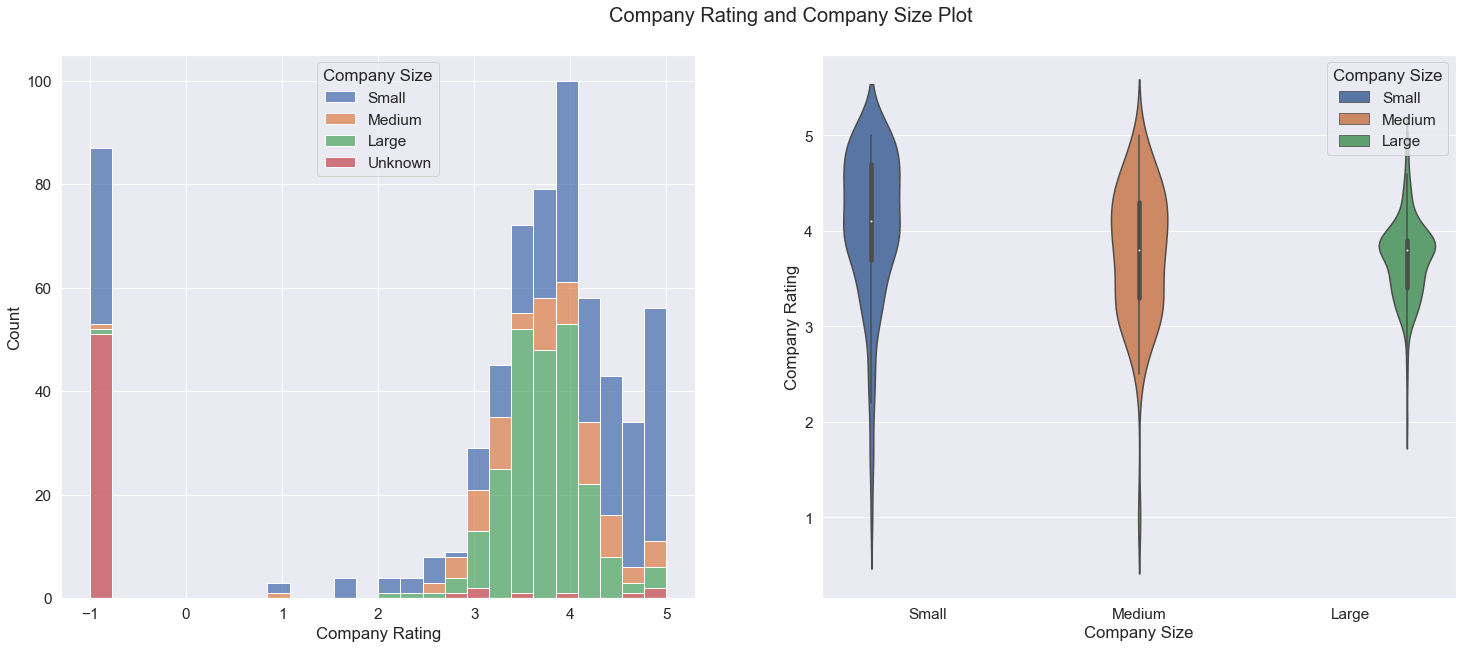

In [8]:
df1 = df[df["Company Size"]!="Unknown"]
df1 = df1[df1["Company Rating"]!=-1]
fig, ax = plt.subplots(1,2,figsize=(25,10))
chart1 = sns.histplot(x="Company Rating",hue="Company Size",multiple="stack",data=df,ax=ax[0])
chart2 = sns.violinplot(x="Company Size",y="Company Rating",hue="Company Size",data=df1,ax=ax[1])
plt.title("Company Rating and Company Size Plot",fontsize=20,x=-0.05,y=1.05)

I want to start by showing a plot of the company rating and the company size to get an idea of the rating of each company based on their company size. These plots show a simply correlation between two data columns, the company size and the company rating, which you can see that the small company on average have a higher company rating. Then, the trend for company rating seems to start slowly decreases as the size of the company increases. Here we can see that the medium size company have a simliar company rating average to the small company, however, the company rating for large company on average is lower than the small and medium company size. 

### Visualizing which company size has the highest company rating and the corresponding average salary range

Text(0.5, 1.0, 'Company Rating and Company Size with Average Salary Plot')

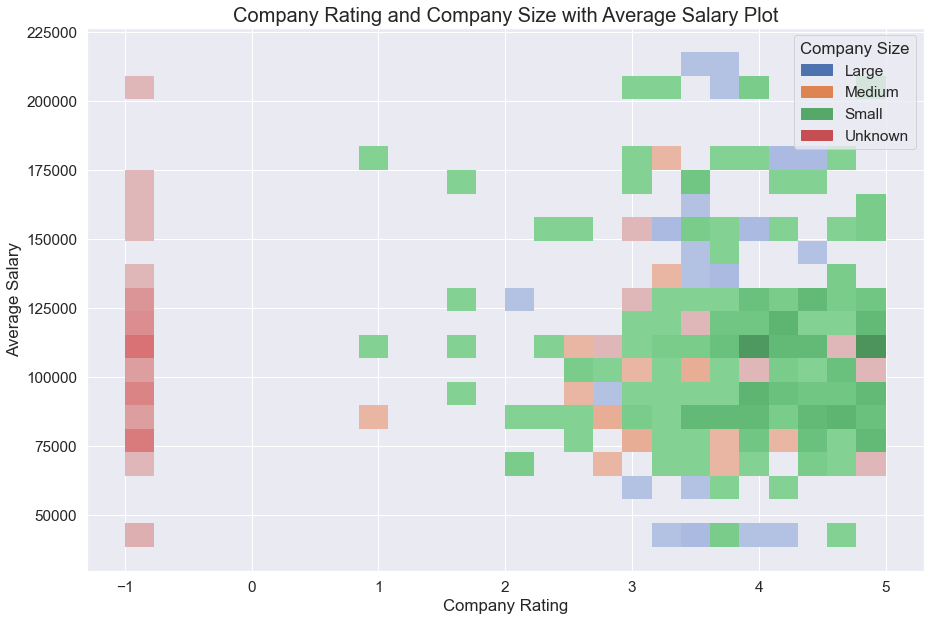

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
chart3 = sns.histplot(x="Company Rating", 
                      y="Average Salary",
                      hue="Company Size",
                      hue_order=["Large","Medium","Small","Unknown"],
                      data=df)
plt.title("Company Rating and Company Size with Average Salary Plot",fontsize=20)

Next, this plot is visualizing the three variables in this dataset, company rating, average salary, and company size. First observation is the relationship between the company rating and average salary. The more shaded cell indicates a higher the count, which here it can be observed that most of the company ratings are at around 4 and 5 with the average salary between 80K and 110K USD. Obviously, the color indicates the company size, darker shaded green means most of the high company rating are from small company. Overall, it seem that the majority of companies with good rating offer jobs between 80K and 110K USD, and the majority of companies with good rating are small company.

### Visualizing number of available job at each size of company

Text(0.5, 0, 'Number of Available Job Count')

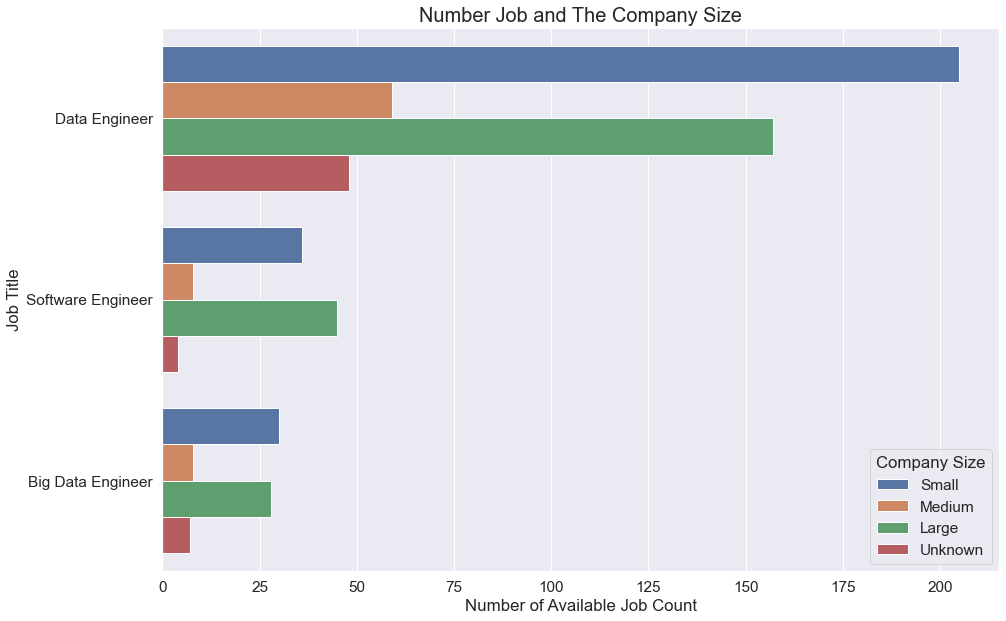

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
chart4 = sns.countplot(y="Job Title",hue="Company Size",data=df)
chart4.set_title("Number Job and The Company Size",fontsize=20)
chart4.set_xlabel("Number of Available Job Count")

#### In conclusion to the first research question based on the observations from the plots above, small company seems to above average rating then compared to medium and large company, there are more job opportunities at a small company, overall there more available job options if you want to work for small company, and on average you would be compensated fairly well. This leads to the next research topic which is does the size of the company affects the job salary.

## (RQ2) Does the size of the company affects the job salary

### Which company size has a higher estimated average salary

Text(-0.05, 1.05, 'Average Salary and Company Size Plot')

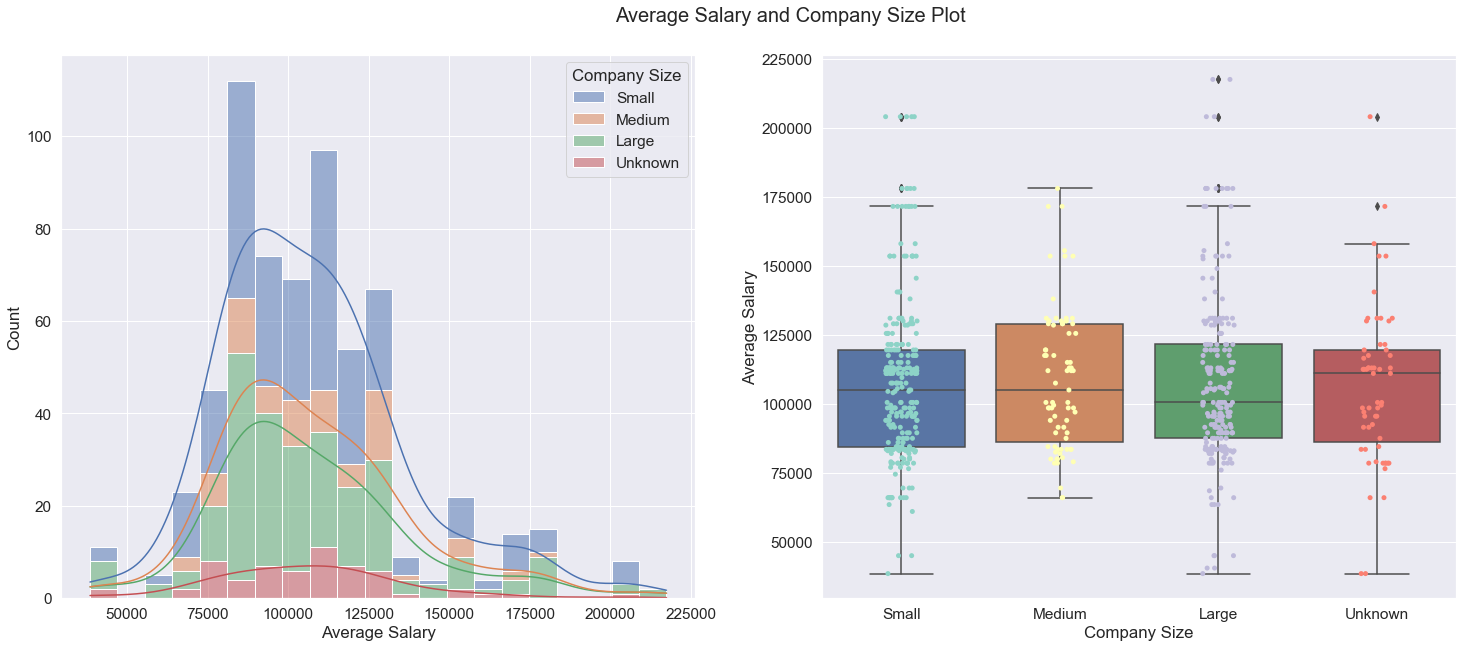

In [11]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
chart5 = sns.histplot(x="Average Salary",hue="Company Size",data=df,multiple="stack",kde=True,ax=ax[0])
chart6 = sns.boxplot(y="Average Salary",x="Company Size",data=df,ax=ax[1])
sns.stripplot(y="Average Salary",x="Company Size",data=df,palette="Set3",ax=ax[1])
plt.title("Average Salary and Company Size Plot",fontsize=20,x=-0.05,y=1.05)

In the right plot, the relationship between the company size and the average salary can be observed. In the box plot, the median average salary can be seen to does not deviate too far from each other. Therefore, a simply comparison can be made between the size company and the average salary is that the size of the company doesn't seem to have an affect on the salary in these type of jobs. The box plot provides an addition visualization to the comparison and made the comparison more distinguishable. Although, the minimum average salary might be different between the three company sizes, there maximum are within a similiar range.

### Which company size provides the highest paying job

Text(0.5, 1.0, 'Top 10 highest paying jobs')

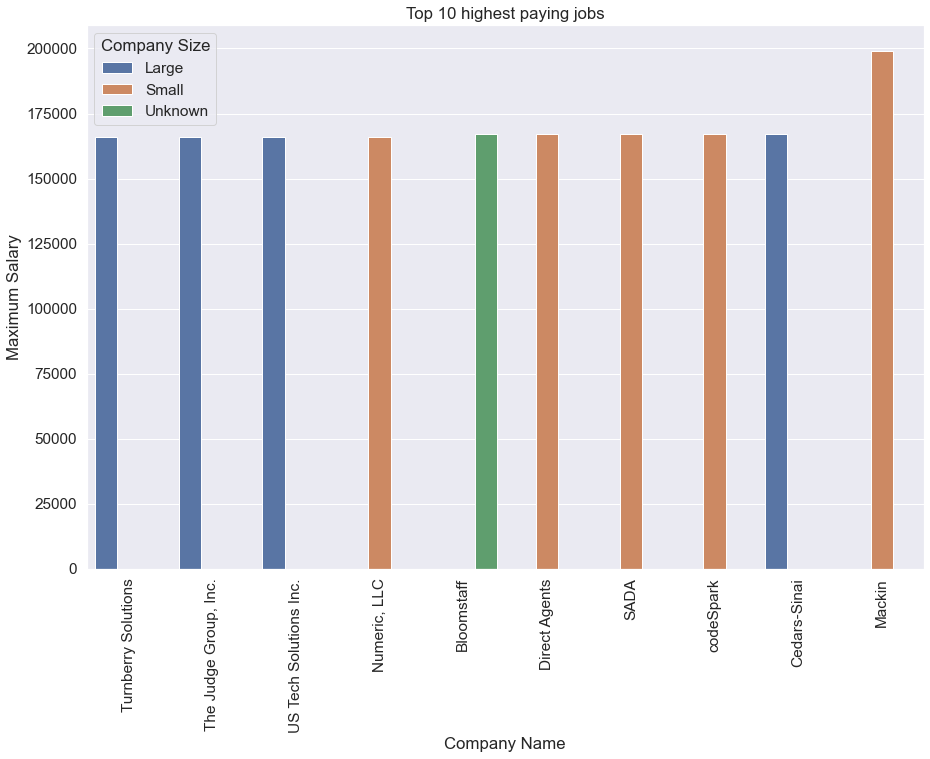

In [12]:
df_top = df.sort_values("Maximum Salary")
df_top = df_top.reset_index()
df_top = df_top.loc[df["Maximum Salary"]>=215000]


fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation="vertical")
chart7 = sns.barplot(x="Company Name", y="Maximum Salary",hue="Company Size",data=df_top)
plt.title("Top 10 highest paying jobs")

From this plot, it can be clearly observed that the majority and the highest paying jobs are from a small company. 

### Which company size provides the lowest paying job

Text(0.5, 1.0, 'Top 20 of The Lower Paying Jobs')

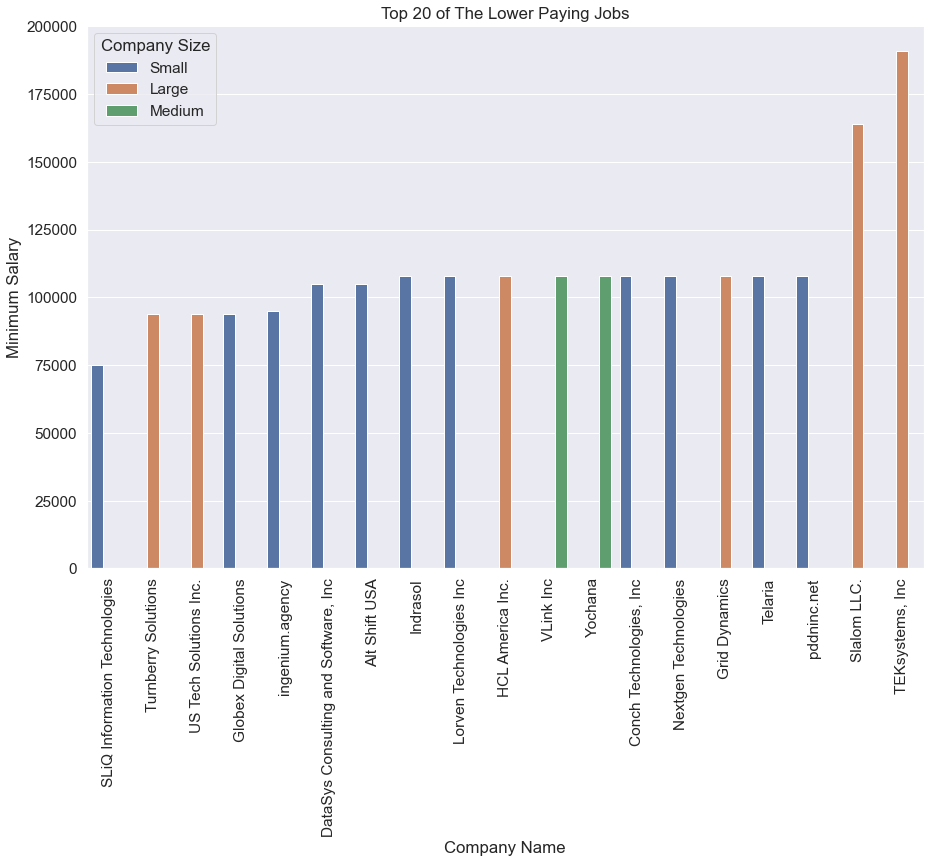

In [13]:
df_top = df.sort_values("Minimum Salary")
df_top = df_top.reset_index()
df_top = df_top.loc[df["Minimum Salary"]<=53000]

fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation="vertical")
chart8 = sns.barplot(x="Company Name", y="Minimum Salary",hue="Company Size",data=df_top)
plt.title("Top 20 of The Lower Paying Jobs")

The lowest starting salary job as well as the are mostly from a large company and out of the top 20 lowest paying jobs the majority are from a large company.

#### A quick conclusion to the second research question based on the observations, is that the size of the company doesn't seem to have an affect on the salary. However, it can be seen that small company provides more of the top highest paying jobs and the large company does offers more lower starting salary jobs. From these observations, it can seen that more people might be attracted to working for a small company based on the salary they provide. 

## (RQ3) Which area in the US has the most available jobs

### A visualization of which city has the most job listings

Text(0, 0.5, '')

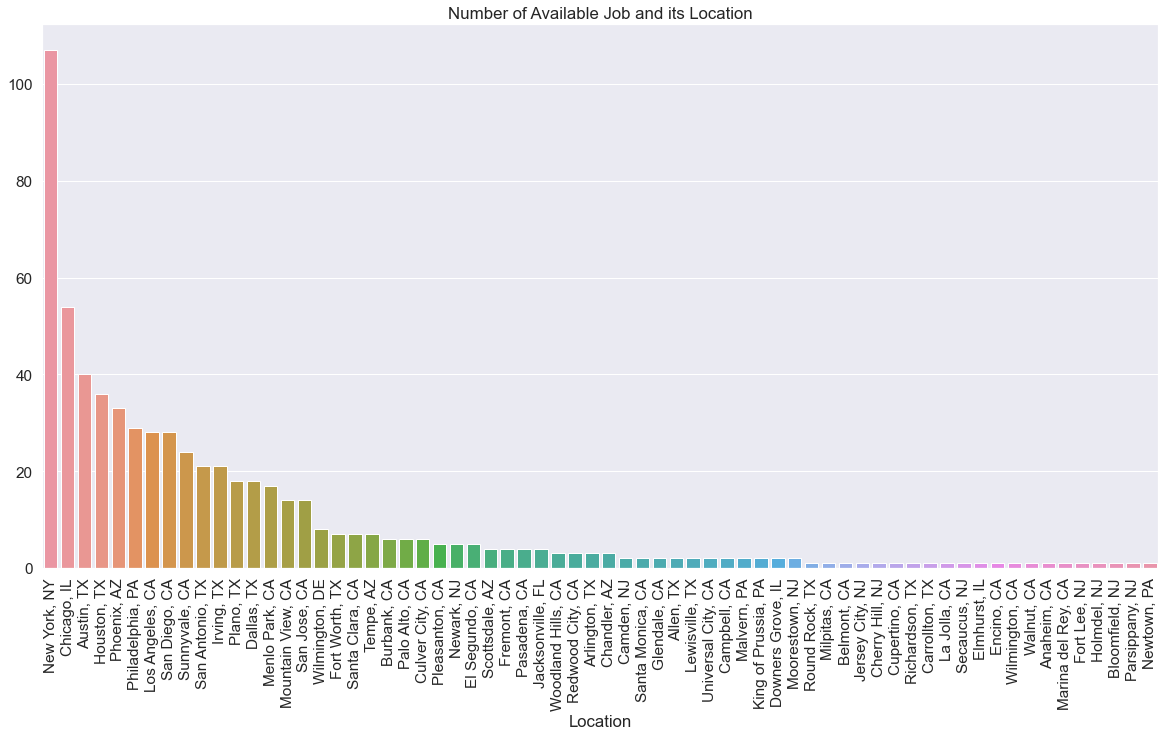

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
chart9 = sns.countplot(x="Location",data=df,order=df['Location'].value_counts().index)
plt.xticks(rotation="vertical")
plt.title("Number of Available Job and its Location")
plt.ylabel("")

From this plot you can see the city with the most available jobs is New York City with the second Chicago which is not far from New York. They're both from the East Coast of the US. However, in the next plot, you will see which state has the most available jobs. 

Text(0.5, 0, 'State')

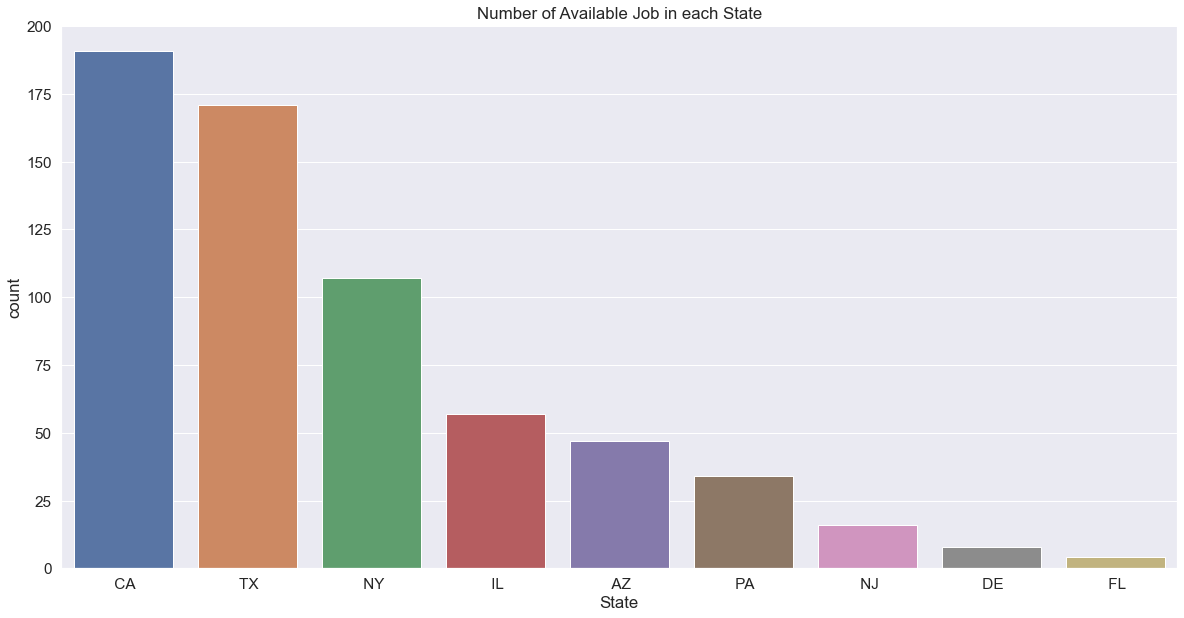

In [15]:
df_state = df
df_state["Location"] = df_state["Location"].replace(r'^.*?,', '', regex=True)
fig, ax = plt.subplots(figsize=(20,10))
chart10 = sns.countplot(x="Location",data=df_state,order=df_state['Location'].value_counts().index)
plt.title("Number of Available Job in each State")
plt.xlabel("State")

As previously seen, the city with the most available jobs is New York, but the state of Californa overall has the most available jobs in the US, which make sense because Sillicon Valley in California is known who its start-up tech company. However, between the West coast, which only consist of CA, and the East coast, which consist of NY,NJ,PA, and FL, in the US, there are more available jobs in the East coast. 

#### Based on these observations, if you want to choice the city with the most available jobs then New York city is your location. However, if you are more interested in the state you are living in than the city, then California would be the best opportunity for you to find a job in this fields.

## Quick Summary

#### A quick summary of the research questions. Overall the findings in the dataset show that small company has on average has better company rating, average salary at small company are similiar to those at larger company in these type of jobs, and depending your interests in your working location, if working in a city is more important than the state you are living in, then New York is the best location where you most likely find a job. However, if you are not keen on living in one specific city in that state then California would be the ideal location for you to find a job in this field.